# Data Simulation

First we generated 10 means mk from a bivariate Gaussian distribution N ((1, 0)T , I) and labeled this class BLUE. Similarly, 10 more were drawn from N((0,1)T,I) and labeled class ORANGE. <br/>
Then for each class we generated 100 observations as follows: <br/>
for each observation, we picked an mk at random with probability 1/10, and then generated a N(mk,I/5), thus leading to a mixture of Gaussian clus- ters for each class.

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [29]:
def generate_data():
    mean_blue = [1,0]
    mean_orange = [0,1]
    mean_cov = np.eye(2)
    mean_size = 10
    
    blue_centers = np.random.multivariate_normal(mean_blue, mean_cov, mean_size)
    orange_centers = np.random.multivariate_normal(mean_orange, mean_cov, mean_size)
    
    sample_size = 100
    sample_cov = mean_cov/5
    
    blue_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        blue_samples[i] = np.random.multivariate_normal(blue_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    blue_samples = [item[0] for item in blue_samples]
    blue_y = np.zeros(sample_size)
    
    orange_samples = list(np.zeros(sample_size))
    for i in range(sample_size):
        orange_samples[i] = np.random.multivariate_normal(orange_centers[random.randint(0,mean_size-1)], sample_cov, 1)
    orange_samples = [item[0] for item in orange_samples]
    orange_y = np.ones(sample_size)
    
    data_x = np.concatenate((blue_samples,orange_samples), axis = 0)
    data_y = np.concatenate((blue_y, orange_y))
    
    return data_x, data_y


In [30]:
data_x, data_y = generate_data()

In [50]:
blue_samples = data_x[data_y==0, :]
orange_samples = data_x[data_y==1, :]

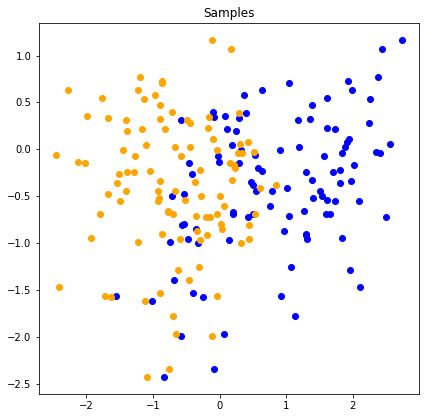

In [58]:
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,2,1)

ax1.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax1.plot(orange_samples[:,0], blue_samples[:,1], 'o', color='orange')
ax1.set_title("Samples")
plt.show()

# Least Squares: Linear Model

### Use solver

In [60]:
# Linear regression
mat_x = np.hstack((np.ones((200, 1)), data_x))
mat_xt = np.transpose(mat_x)
vec_y = data_y

# Solve (X^T*X)b = X^T*y for b
ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, vec_y))

print('=== Estimated Coefficients for OLS ===')
print('beta0:', ols_beta[0], '(constant)')
print('beta1:', ols_beta[1])
print('beta2:', ols_beta[2])

=== Estimated Coefficients for OLS ===
beta0: 0.4435018200740728 (constant)
beta1: -0.22507302962520656
beta2: 0.18423624821175197


### Use formula

In [61]:
beta = np.matmul(np.linalg.inv(np.matmul(mat_xt, mat_x)), np.matmul(mat_xt, vec_y))

In [62]:
beta

array([ 0.44350182, -0.22507303,  0.18423625])

## Plot

decision boundary {x : xT β = 0.5}

/Users/ag80509/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


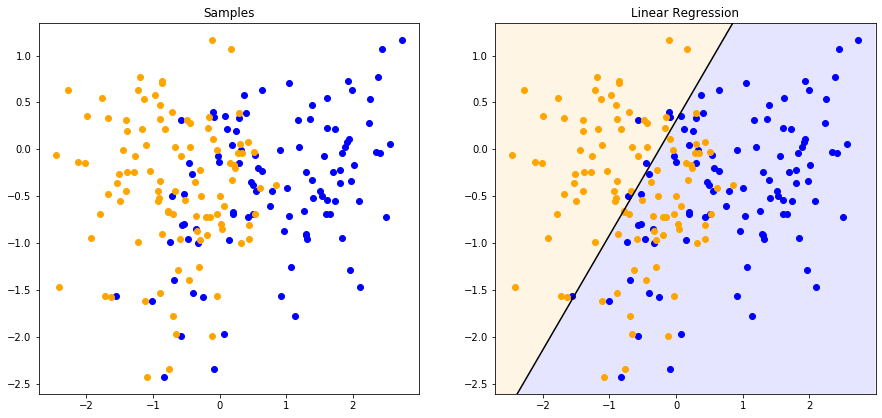

In [84]:
ax2 = fig.add_subplot(2, 2, 2)
ax2.clear()
ax2.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax2.plot(orange_samples[:,0], blue_samples[:,1], 'o', color='orange')
ax2.set_title("Linear Regression")

x1_min, x1_max = ax1.get_xlim()
x2_min, x2_max = ax1.get_ylim()
x2_bound_min = (0.5 - beta[0] - x1_min * beta[1])/beta[2]
x2_bound_max = (0.5 - beta[0] - x1_max * beta[1])/beta[2]

ax2.plot([x1_min, x1_max], [x2_bound_min, x2_bound_max], color = 'black')
ax2.set_xlim(x1_min, x1_max)
ax2.set_ylim(x2_min, x2_max)

ax2.fill_between([x1_min, x1_max], [x2_bound_min, x2_bound_max], x2_min, facecolor = 'blue', alpha = 0.1)
ax2.fill_between([x1_min, x1_max], [x2_bound_min, x2_bound_max], x2_max, facecolor = 'orange', alpha = 0.1)
fig

# K Nearest Neighbors

In [108]:
def knn(k, sample, data_x, data_y):
    distances = [(sum((x - sample)**2), y) for x, y in zip(data_x, data_y)]
    distances.sort()
    knn = sum([item[1] for item in (distances[:k])])/k
    return knn

In [109]:
data_x[0]

array([1.99541031, 0.63548975])

In [110]:
knn(4, data_x[0], data_x, data_y)

0.0

## Grid Plot

In [163]:
knn_grid = np.array([np.array([i, j])
                     for i in np.arange(x1_min, x1_max, .1)
                     for j in np.arange(x2_min, x2_max, .1)])


In [164]:
knn15 = np.array([np.array([i, j, knn(15, np.array([i, j]), data_x, data_y)])
    for i, j in knn_grid])

In [165]:
knn1 = np.array([np.array([i, j, knn(1, np.array([i, j]), data_x, data_y)])
    for i, j in knn_grid])

In [156]:
knn15_blue = np.array([list(item) for item in knn15 if item[2]<0.5])
knn15_orange = np.array([list(item) for item in knn15 if item[2]>0.5])

In [166]:
knn1_blue = np.array([list(item) for item in knn1 if item[2]<0.5])
knn1_orange = np.array([list(item) for item in knn1 if item[2]>0.5])

/Users/ag80509/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.
/Users/ag80509/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


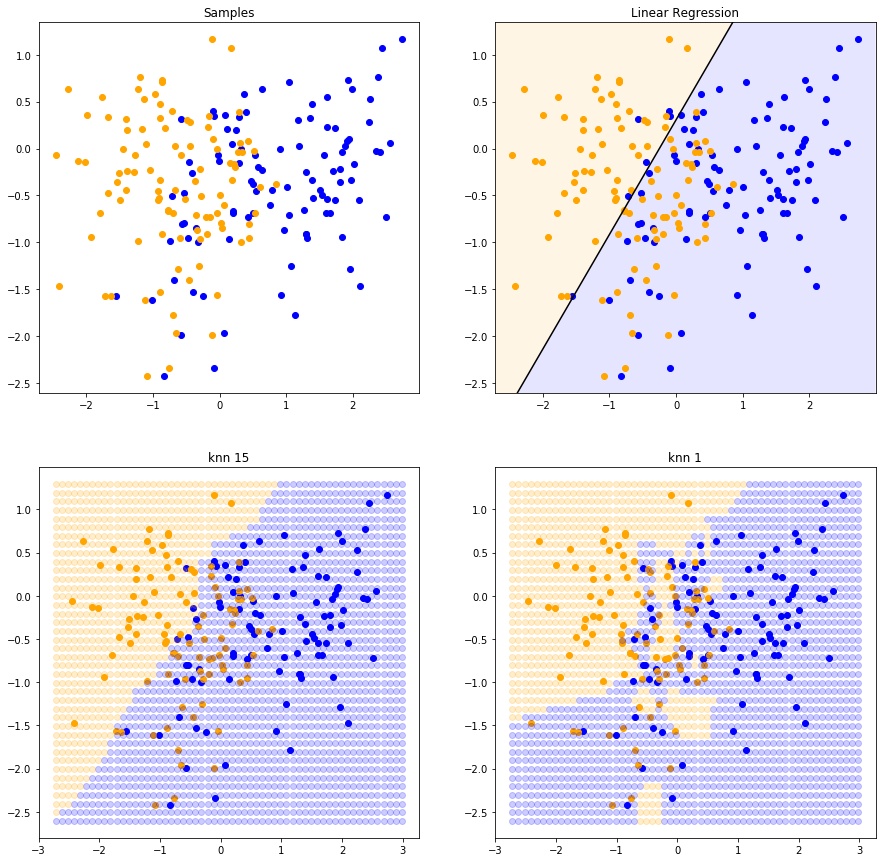

In [174]:
ax3 = fig.add_subplot(2, 2, 3)
ax3.clear()
ax3.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax3.plot(orange_samples[:,0], blue_samples[:,1], 'o', color='orange')
ax3.plot(knn15_blue[:,0], knn15_blue[:,1], 'o', color='blue', alpha=0.2)
ax3.plot(knn15_orange[:,0], knn15_orange[:,1], 'o', color='orange', alpha=0.2)
ax3.set_title('knn 15')

ax4 = fig.add_subplot(2, 2, 4)
ax4.clear()
ax4.plot(blue_samples[:,0], blue_samples[:,1], 'o', color='blue')
ax4.plot(orange_samples[:,0], blue_samples[:,1], 'o', color='orange')
ax4.plot(knn1_blue[:,0], knn1_blue[:,1], 'o', color='blue', alpha=0.2)
ax4.plot(knn1_orange[:,0], knn1_orange[:,1], 'o', color='orange', alpha=0.2)
ax4.set_title('knn 1')
fig